## 0. Reference

* [(Paper) Estimating Contextual Situations Using Indicators from Smartphone Sensor Values](https://ieeexplore.ieee.org/document/7059668)
* [From Scratch: Bayesian Inference, Markov Chain Monte Carlo and Metropolis Hastings, in python](https://nbviewer.jupyter.org/github/Joseph94m/MCMC/blob/master/MCMC.ipynb)
* [Particle Filters](https://nbviewer.jupyter.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/12-Particle-Filters.ipynb)
* [機率圖模型 -- Metropolis Hasting](http://cpmarkchang.logdown.com/posts/737249-pgm-metropolis-hasting)

<img src="https://i.imgur.com/T2e2n11.png" width="50%" align="left"/>

In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

%matplotlib inline

## 1. Kernel Density Estimation

smooth parameter 或 bandwidth 基於經驗法則，$h=(4\sigma^5/3n)^{1/5}$

才會產生相對平滑的 KDE

In [2]:
test = np.random.normal(100, 20, 300)[:, np.newaxis]
h = (4/3*np.std(test)**5/len(test))**(1/5)
print(f'h = {h}')

h = 6.864694359401921


In [3]:
kde1 = KernelDensity(kernel='gaussian', bandwidth=1).fit(test)
kde2 = KernelDensity(kernel='gaussian', bandwidth=2).fit(test)
kde3 = KernelDensity(kernel='gaussian', bandwidth=h).fit(test)

density1 = np.exp(kde1.score_samples(test))
density2 = np.exp(kde2.score_samples(test))
density3 = np.exp(kde3.score_samples(test))

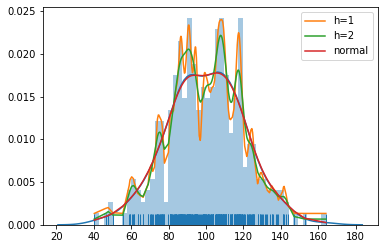

In [4]:
sb.distplot(test[:, 0], rug=True, bins=50)
sb.lineplot(test[:, 0], density1, label='h=1')
sb.lineplot(test[:, 0], density2, label='h=2')
sb.lineplot(test[:, 0], density3, label='normal')

In [5]:
def build_kde(data):
    data = data[:, np.newaxis] # 轉二維
    h = (4/3*np.std(data)**5/len(data))**(1/5)
    return KernelDensity(kernel='gaussian', bandwidth=h).fit(data)

## 2. Model

只考慮四個主要的 sensor，建模固定採樣 300 點

In [6]:
n_samples = 300
sensor = ['light', 'sound', 'time', 'orientY']

### Kitchen

In [7]:
# cook
light = np.random.normal(200, 20, n_samples)
sound = np.random.normal(60, 20, n_samples)
time_category = [16, 17, 18, 19]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(90, 10, n_samples)
cook = dict(light=light, sound=sound, time=time, orientY=orientY)
cook_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

In [8]:
# clean
light = np.random.normal(200, 20, n_samples)
sound = np.random.normal(80, 20, n_samples)
time_category = [19, 20]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(90, 10, n_samples)
clean = dict(light=light, sound=sound, time=time, orientY=orientY)
clean_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

### Bedroom

In [9]:
# sleep
light = np.random.normal(20, 5, n_samples)
sound = np.random.normal(30, 10, n_samples)
time_category = [22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(0, 5, n_samples)
sleep = dict(light=light, sound=sound, time=time, orientY=orientY)
sleep_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

In [10]:
# study
light = np.random.normal(100, 20, n_samples)
sound = np.random.normal(50, 10, n_samples)
time_category = [18, 19, 20]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(0, 10, n_samples)
study = dict(light=light, sound=sound, time=time, orientY=orientY)
study_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

### Living Room

In [11]:
# tv
light = np.random.normal(300, 20, n_samples)
sound = np.random.normal(80, 30, n_samples)
time_category = [17, 18, 19, 20, 21, 22, 23]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(0, 10, n_samples)
tv = dict(light=light, sound=sound, time=time, orientY=orientY)
tv_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

In [12]:
# eat
light = np.random.normal(200, 20, n_samples)
sound = np.random.normal(70, 10, n_samples)
time_category = [7, 8, 12, 13, 18, 19]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(90, 10, n_samples)
eat = dict(light=light, sound=sound, time=time, orientY=orientY)
eat_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

### Model KDE

同地點的比較

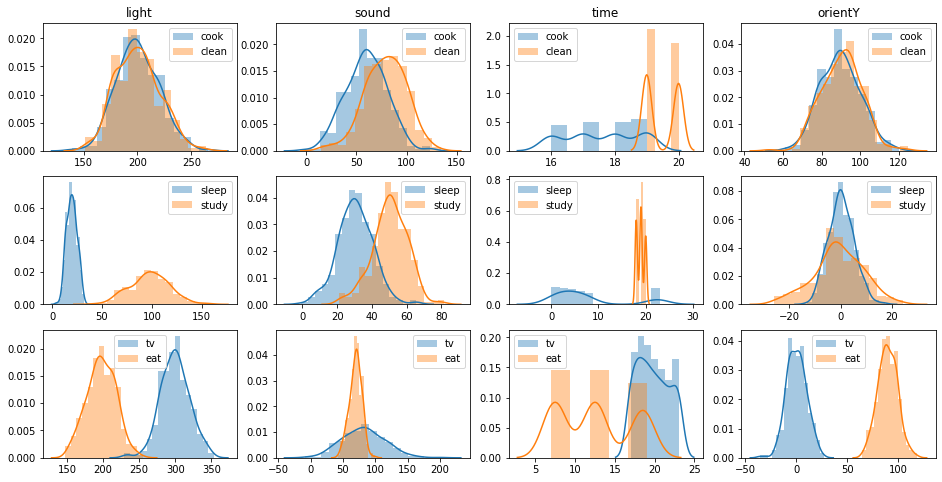

In [13]:
fig, ax = plt.subplots(3, 4, figsize=(16, 8))

for i in range(len(sensor)):
    # kitchen
    ax[0, i].set_title(sensor[i])
    sb.distplot(cook[sensor[i]], ax=ax[0, i], label='cook')
    sb.distplot(clean[sensor[i]], ax=ax[0, i], label='clean')
    ax[0, i].legend()
    # bedroom
    sb.distplot(sleep[sensor[i]], ax=ax[1, i], label='sleep')
    sb.distplot(study[sensor[i]], ax=ax[1, i], label='study')
    ax[1, i].legend()
    # living room
    sb.distplot(tv[sensor[i]], ax=ax[2, i], label='tv')
    sb.distplot(eat[sensor[i]], ax=ax[2, i], label='eat')
    ax[2, i].legend()

不同地點的比較

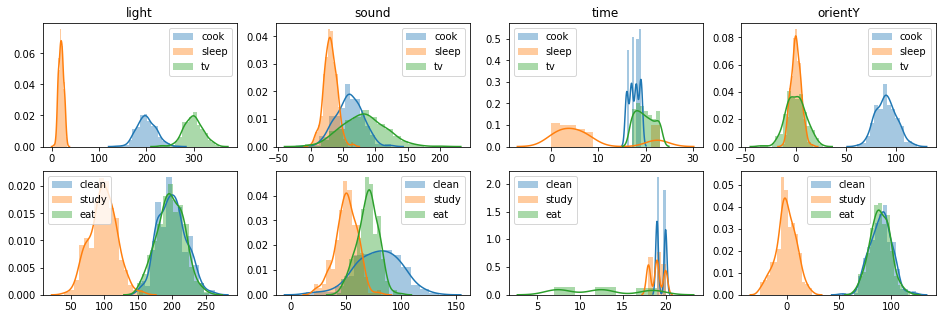

In [14]:
fig, ax = plt.subplots(2, 4, figsize=(16, 5))

for i in range(len(sensor)):
    ax[0, i].set_title(sensor[i])
    sb.distplot(cook[sensor[i]], ax=ax[0, i], label='cook')
    sb.distplot(sleep[sensor[i]], ax=ax[0, i], label='sleep')
    sb.distplot(tv[sensor[i]], ax=ax[0, i], label='tv')
    ax[0, i].legend()
    sb.distplot(clean[sensor[i]], ax=ax[1, i], label='clean')
    sb.distplot(study[sensor[i]], ax=ax[1, i], label='study')
    sb.distplot(eat[sensor[i]], ax=ax[1, i], label='eat')
    ax[1, i].legend()

不同情境的比較

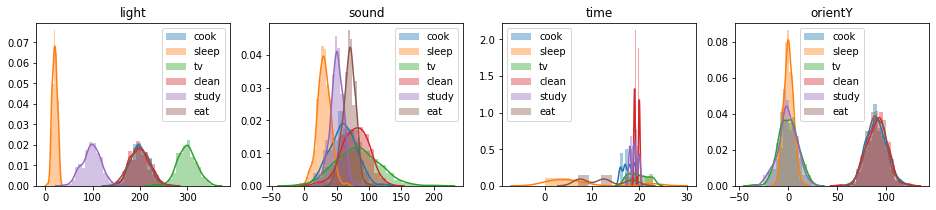

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3))

for i in range(len(sensor)):
    ax[i].set_title(sensor[i])
    sb.distplot(cook[sensor[i]], ax=ax[i], label='cook')
    sb.distplot(sleep[sensor[i]], ax=ax[i], label='sleep')
    sb.distplot(tv[sensor[i]], ax=ax[i], label='tv')
    sb.distplot(clean[sensor[i]], ax=ax[i], label='clean')
    sb.distplot(study[sensor[i]], ax=ax[i], label='study')
    sb.distplot(eat[sensor[i]], ax=ax[i], label='eat')
    ax[i].legend()

## 3. Estimation

假設馬克夫鏈：廚房 <-> 客廳 <-> 臥室


可到達的情境機率相同：$1/(walkable\ situation)$

In [16]:
model = dict(cook=cook_kde, clean=clean_kde, sleep=sleep_kde, study=study_kde, tv=tv_kde, eat=eat_kde)

In [17]:
situation = ['cook', 'clean', 'sleep', 'study', 'tv', 'eat']
markov = {
    'cook': ['clean', 'tv', 'eat'],
    'clean': ['cook', 'tv', 'eat'],
    'tv': ['clean', 'cook', 'eat', 'sleep', 'study'],
    'eat': ['clean', 'cook', 'tv', 'sleep', 'study'],
    'sleep': ['study', 'tv', 'eat'],
    'study': ['sleep', 'tv', 'eat']
}

### Metropolis Hasting

配合重採樣，在此亂數取可能的情境即可

否則依照提議分佈的 acceptance probability，會不容易改變情境

In [18]:
def draw_situation(curr_situation):
    proposal = np.random.choice(markov[curr_situation], 1)[0] # 取值
#     alpha = min(1, 1/len(markov[curr_situation])) # acceptance probability
# #     隨機亂數並比較 alpha，小於即改變狀態
#     if np.random.rand() <= alpha:
#         curr_situation = proposal
#     return curr_situation
    return proposal

In [19]:
for i in range(5):
    print(f'{draw_situation("sleep")}')

eat
study
eat
eat
study


### Test Data

根據輸入的值加入雜訊，以貼近真實情況

In [20]:
def gen_test_data(n_samples, light, sound, time, orientY):
    light_arr = np.zeros(n_samples)
    sound_arr = np.zeros(n_samples)
    time_arr = np.full(n_samples, time) # 時間都相同
    orientY_arr = np.zeros(n_samples)
    
    for i in range(n_samples):
        noise = np.random.rand()*(light/8)
        if np.random.randint(0, 2): noise = -noise # 亂數選擇正負
        light_arr[i] = light + noise
        
        noise = np.random.rand()*(sound/5)
        if np.random.randint(0, 2): noise = -noise
        sound_arr[i] = sound + noise
        
        noise = np.random.rand()*3
        if np.random.randint(0, 2): noise = -noise
        orientY_arr[i] = orientY + noise
    
    dim1 = dict(light=light_arr, sound=sound_arr, time=time_arr, orientY=orientY_arr)
    dim2 = dict(light=light_arr[:, np.newaxis], sound=sound_arr[:, np.newaxis], time=time_arr[:, np.newaxis], orientY=orientY_arr[:, np.newaxis])
    return dict(dim1=dim1, dim2=dim2)

此模擬睡眠的感測資料，採樣 5 個

In [21]:
test_data = gen_test_data(n_samples=5, light=20, sound=20, time=6, orientY=0)

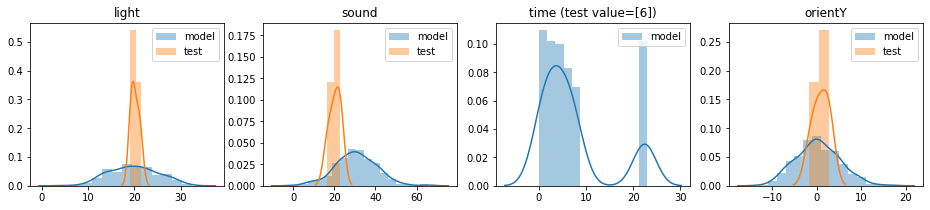

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3))

for i in range(len(sensor)):
    # sleep
    ax[i].set_title(sensor[i])
    sb.distplot(sleep[sensor[i]], ax=ax[i], label='model')
    if sensor[i] == 'time':
        ax[i].set_title(f'time (test value={test_data["dim2"]["time"][0]})')
    else:
        sb.distplot(test_data['dim2'][sensor[i]], ax=ax[i], label='test')
    ax[i].legend()

### Weighting

個別 sensor 權重：$w^{sensor}_{t}=p(d_{value}|m)$，由當前 sensor 資訊計算


particle 權重：$w^{situation}_{t}\ {\propto}\ w^{situation}_{t-1}*{\prod}w^{sensor}_{t}$

因取 log，所以結果為負

In [23]:
def compute_particle_weight(test_data, curr_situation, particle_weight):
    curr_model = model[curr_situation]
    sensor_weight = 0
    # 計算全部 sensor 權重
    for i, curr_sensor in enumerate(sensor):
        # 計算個別 sensor 的 log density 取平均後相加
        log_score = np.mean(curr_model[curr_sensor].score_samples(test_data[curr_sensor]))
        sensor_weight = sensor_weight + log_score
    # 計算 particle 權重，越不像者 sensor_weight 負越大 (log)
    particle_weight = particle_weight * sensor_weight
    return particle_weight

In [24]:
for i in range(len(situation)):
    sit = situation[i]
    weight = compute_particle_weight(test_data['dim2'], sit, 1/10)
    print(f'I guess {sit}? {weight}')

I guess cook? -68.27616334980756
I guess clean? -327.7410522200903
I guess sleep? -1.1734225654603798
I guess study? -106.05794923497906
I guess tv? -61.80245747885065
I guess eat? -42.27717489151802


### Particle Filter

<img src="https://i.imgur.com/SAhXblu.png" width="30%" align="left"/>

In [25]:
def particle_filter(n_particles, Smin, rounds, test_data, curr_situation, debug):
    all_weight = np.full(n_particles, 1/n_particles)
    all_situation = [curr_situation] * n_particles
    best_situation = curr_situation
    Sbest = 1
    resample_freq = 0
    for n in range(rounds):
        # 抽選情境並計算權重
        for i in range(n_particles):
            all_situation[i] = draw_situation(all_situation[i])
            all_weight[i] = compute_particle_weight(test_data, all_situation[i], all_weight[i])

        # 標準化，補回負
        all_weight = - all_weight / np.sum(all_weight) 
        # 有效粒子數，越小表示退化嚴重
        # 分母為小數，過小的權重會導致有效粒子數變高，有點棘手
        Seff = 1/np.sum(all_weight**2)
        
        high_situation = all_situation[np.argmax(all_weight)]
        if Seff > Sbest:
            best_situation = high_situation
            Sbest = Seff

        if debug:
            print(f'Seff: {Seff}, Sbest: {Sbest}, best situation: {high_situation}')
            print(f'particle weights:\n {all_weight}')
            print(f'particle situations:\n {all_situation}')

        # 重採樣
        if Seff < Smin and n < rounds:
            if debug: print('\n')  
                
            for i in range(n_particles):
                if i <= n_particles/2:
                    all_situation[i] = high_situation
                else:
                    all_situation[i] = draw_situation(all_situation[i])
            # 全部 particle 權重設為一樣
            all_weight = np.full(n_particles, 1/n_particles)
            resample_freq = resample_freq + 1
        else:
            return best_situation, resample_freq
    return best_situation, resample_freq

In [26]:
x, y = particle_filter(n_particles=10, Smin=4, rounds=3, test_data=test_data['dim2'], curr_situation='tv', debug=1)
print(f'\nfinal situation: {x}, resample times: {y}')

Seff: 3.800475687167341, Sbest: 3.800475687167341, best situation: sleep
particle weights:
 [-0.34252224 -0.00122634 -0.00122634 -0.11084118 -0.00122634 -0.00122634
 -0.11084118 -0.34252224 -0.04418388 -0.04418388]
particle situations:
 ['clean', 'sleep', 'sleep', 'study', 'sleep', 'sleep', 'study', 'clean', 'eat', 'eat']


Seff: 6.122352911950211, Sbest: 6.122352911950211, best situation: eat
particle weights:
 [-0.10512413 -0.04190493 -0.0612583  -0.10512413 -0.10512413 -0.04190493
 -0.32485536 -0.06767501 -0.10512413 -0.04190493]
particle situations:
 ['study', 'eat', 'tv', 'study', 'study', 'eat', 'clean', 'cook', 'study', 'eat']

final situation: eat, resample times: 1


## 4. Simulation

In [27]:
def simulation(sim_times, n_particles, Smin, rounds, test_data, curr_situation, truth):
    ans = []
    resample = []
    for i in range(sim_times):
        result = particle_filter(n_particles, Smin, rounds, test_data, curr_situation, 0)
        ans = ans + [result[0]]
        resample = resample + [result[1]]
    accuracy = ans.count(truth) / len(ans)
    frequency = np.mean(resample)
    print(f'predict: {ans}')
    print(f'accuracy: {accuracy}', f'resample frequency: {frequency}\n')

測試皆執行 10 次觀察

ground truth 皆為 sleep

In [28]:
truth = 'sleep'
sim_times = 10

從可到達的情境出發


對 sleep 來說即是 study、tv、eat

In [29]:
curr_situation = 'tv'

In [30]:
simulation(sim_times, 10, 2, 3, test_data['dim2'], curr_situation, truth)
simulation(sim_times, 10, 4, 3, test_data['dim2'], curr_situation, truth)
simulation(sim_times, 10, 6, 3, test_data['dim2'], curr_situation, truth)

predict: ['sleep', 'sleep', 'sleep', 'sleep', 'eat', 'cook', 'sleep', 'eat', 'cook', 'sleep']
accuracy: 0.6 resample frequency: 0.0

predict: ['eat', 'sleep', 'sleep', 'sleep', 'eat', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep']
accuracy: 0.8 resample frequency: 0.2

predict: ['sleep', 'eat', 'sleep', 'eat', 'sleep', 'eat', 'sleep', 'eat', 'eat', 'eat']
accuracy: 0.4 resample frequency: 1.4



In [31]:
simulation(sim_times, 30, 6, 6, test_data['dim2'], curr_situation, truth)
simulation(sim_times, 30, 12, 6, test_data['dim2'], curr_situation, truth)
simulation(sim_times, 30, 18, 6, test_data['dim2'], curr_situation, truth)

predict: ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep']
accuracy: 1.0 resample frequency: 0.0

predict: ['sleep', 'sleep', 'eat', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep']
accuracy: 0.9 resample frequency: 0.1

predict: ['eat', 'sleep', 'eat', 'sleep', 'sleep', 'eat', 'eat', 'sleep', 'sleep', 'sleep']
accuracy: 0.6 resample frequency: 2.9



In [32]:
simulation(sim_times, 50, 10, 10, test_data['dim2'], curr_situation, truth)
simulation(sim_times, 50, 20, 10, test_data['dim2'], curr_situation, truth)
simulation(sim_times, 50, 30, 10, test_data['dim2'], curr_situation, truth)

predict: ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep']
accuracy: 1.0 resample frequency: 0.0

predict: ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep']
accuracy: 1.0 resample frequency: 0.0

predict: ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep']
accuracy: 1.0 resample frequency: 3.5



從不合理的情境出發

對 sleep 來說即是 cook、clean

In [33]:
curr_situation = 'cook'

In [34]:
simulation(sim_times, 10, 2, 3, test_data['dim2'], curr_situation, truth)
simulation(sim_times, 10, 4, 3, test_data['dim2'], curr_situation, truth)
simulation(sim_times, 10, 6, 3, test_data['dim2'], curr_situation, truth)

predict: ['eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat']
accuracy: 0.0 resample frequency: 0.0

predict: ['eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat']
accuracy: 0.0 resample frequency: 0.0

predict: ['eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'tv', 'sleep', 'sleep']
accuracy: 0.2 resample frequency: 0.8



In [35]:
simulation(sim_times, 30, 6, 6, test_data['dim2'], curr_situation, truth)
simulation(sim_times, 30, 12, 6, test_data['dim2'], curr_situation, truth)
simulation(sim_times, 30, 18, 6, test_data['dim2'], curr_situation, truth)

predict: ['eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat']
accuracy: 0.0 resample frequency: 0.0

predict: ['eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat']
accuracy: 0.0 resample frequency: 0.0

predict: ['eat', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'eat']
accuracy: 0.8 resample frequency: 2.6



In [36]:
simulation(sim_times, 50, 10, 10, test_data['dim2'], curr_situation, truth)
simulation(sim_times, 50, 20, 10, test_data['dim2'], curr_situation, truth)
simulation(sim_times, 50, 30, 10, test_data['dim2'], curr_situation, truth)

predict: ['eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat']
accuracy: 0.0 resample frequency: 0.0

predict: ['eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat']
accuracy: 0.0 resample frequency: 0.0

predict: ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'eat', 'sleep', 'sleep', 'sleep', 'sleep']
accuracy: 0.9 resample frequency: 4.7



在取權重的部分為配合 scikit-learn 的 KDE score，產生的 log density 可能與原文實作的方式會有些落差

但基本可以看得出來在可到達的情境下準確率是相當高的，在粒子數足夠的情況下幾乎能精準預測

反之從不合理的情境遊蕩到該情境的機率相對不容易，需要靠較高的 Smin 與重採樣才會接近 sleep，否則大多是相對類似的 eat

## 5. Decision Tree

In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import pydotplus
from IPython.display import Image

In [38]:
cook_df = pd.DataFrame(cook)
cook_df['situation'] = 'cook'
clean_df = pd.DataFrame(clean)
clean_df['situation'] = 'clean'
sleep_df = pd.DataFrame(sleep)
sleep_df['situation'] = 'sleep'
study_df = pd.DataFrame(study)
study_df['situation'] = 'study'
tv_df = pd.DataFrame(tv)
tv_df['situation'] = 'tv'
eat_df = pd.DataFrame(eat)
eat_df['situation'] = 'eat'

In [39]:
training_data = pd.concat([cook_df, clean_df, sleep_df, study_df, tv_df, eat_df], ignore_index=True)
training_data

,light,sound,time,orientY,situation
0,238.334459,73.786086,18,93.012654,cook
1,171.725247,77.106704,17,100.213260,cook
2,181.499142,46.450794,19,98.446511,cook
3,184.393672,29.475417,19,76.607456,cook
4,189.439043,64.662854,18,100.905046,cook
...,...,...,...,...,...
1795,215.662274,85.093966,18,91.246267,eat
1796,186.784625,56.147089,12,82.798290,eat
1797,219.288204,75.086073,13,66.692459,eat
1798,210.537609,65.704132,18,88.973844,eat


In [40]:
X_train = training_data[sensor]
Y_train = training_data['situation']

大約三層就可以精準預測

In [41]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

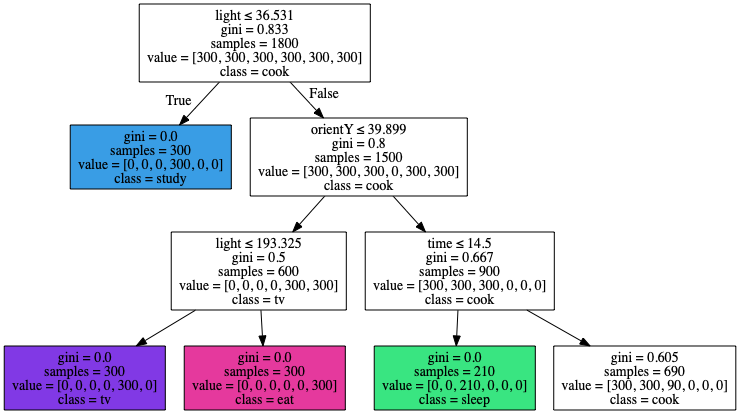

In [42]:
dot_data = export_graphviz(tree, filled=True, 
                feature_names=X_train.columns.to_list(),
                class_names=situation,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

測試資料完全落在正確區間的情況

In [43]:
testing_data = pd.DataFrame(test_data['dim1'])
testing_data['situation'] = 'sleep'
testing_data

,light,sound,time,orientY,situation
0,19.860299,20.649742,6,-1.619812,sleep
1,19.581462,22.861379,6,2.828124,sleep
2,21.365009,18.808331,6,0.901140,sleep
3,20.738113,16.355373,6,-0.039761,sleep
4,19.139345,22.993898,6,2.626456,sleep


In [44]:
X_test = testing_data[sensor]
Y_test = testing_data['situation']

In [45]:
Y_predict = tree.predict(X_test)
accuracy = accuracy_score(Y_test, Y_predict)
print(f'accuracy: {accuracy}\npredict: {Y_predict}')

accuracy: 1.0
predict: ['sleep' 'sleep' 'sleep' 'sleep' 'sleep']


測試資料部分落在正確區間的情況

In [46]:
test_data = gen_test_data(n_samples=5, light=200, sound=70, time=15, orientY=70)

In [47]:
testing_data = pd.DataFrame(test_data['dim1'])
testing_data['situation'] = 'eat'
testing_data

,light,sound,time,orientY,situation
0,224.880584,71.178239,15,71.526511,eat
1,224.814843,80.373326,15,68.142703,eat
2,186.865242,73.424790,15,67.888847,eat
3,213.947388,69.197304,15,71.017296,eat
4,179.136175,66.351775,15,70.932194,eat


In [48]:
X_test = testing_data[sensor]
Y_test = testing_data['situation']

In [49]:
Y_predict = tree.predict(X_test)
accuracy = accuracy_score(Y_test, Y_predict)
print(f'accuracy: {accuracy}\npredict: {Y_predict}')

accuracy: 0.0
predict: ['clean' 'clean' 'clean' 'clean' 'clean']


In [50]:
x, y = particle_filter(n_particles=30, Smin=6, rounds=6, test_data=test_data['dim2'], curr_situation='tv', debug=1)
print(f'\nfinal situation: {x}, resample times: {y}')

Seff: 8.3398725732285, Sbest: 8.3398725732285, best situation: eat
particle weights:
 [-0.0003903  -0.00044677 -0.0003903  -0.00044677 -0.1306101  -0.00044677
 -0.00705554 -0.00519033 -0.1306101  -0.0003903  -0.00044677 -0.00519033
 -0.00519033 -0.00705554 -0.1306101  -0.00705554 -0.1306101  -0.00519033
 -0.0003903  -0.00519033 -0.1306101  -0.00519033 -0.00519033 -0.1306101
 -0.00519033 -0.00705554 -0.00705554 -0.1306101  -0.0003903  -0.00519033]
particle situations:
 ['eat', 'cook', 'eat', 'cook', 'sleep', 'cook', 'clean', 'study', 'sleep', 'eat', 'cook', 'study', 'study', 'clean', 'sleep', 'clean', 'sleep', 'study', 'eat', 'study', 'sleep', 'study', 'study', 'sleep', 'study', 'clean', 'clean', 'sleep', 'eat', 'study']

final situation: eat, resample times: 0


由於此情境感知的模擬有明顯的分佈，適合決策樹的分類

同時可以看得出決策樹之好處是不需知道上個情境的資訊，而粒子濾波器則能夠考慮情境之間的轉移

另外在設計上，決策樹是一次對一筆資料做預測，而粒子濾波器則是以採樣點分佈去與 KDE 相比

但決策樹對於誤差大的資料容忍度較低，而粒子濾波器則需有一定的粒子數才能有好的效果